## Exercise 1: estimating the sample mean and sample variance

You are a statistician working for the U.S. Department of Commerce on the U.S. Census. Congrats! You found a job!

You have been tasked with figuring out the statistical distribution of the heights of people in NYC. You measure the heights of nine people in centimeters and call it a day. Their heights are given in the list `heights` below.

Without `numpy`, estimate the sample mean and sample variance of the distribution.

In [1]:
heights = [176.2, 157.9, 160.1, 180.9, 165.1, 167.2, 162.9, 155.7, 166.2]

In [2]:
#Your code here
#sample_mean = 
#sample_variance = 

## Exercise 2: visualizing and sampling from distributions

Your boss forgot what some distributions look like and they want you to make some plots for them. Thankfully they now let you use `numpy`, `scipy`, and `matplotlib`. Below, plot the binomial and Gaussian (normal) distributions. Overplot samples drawn from the distributions as visualized by histograms.

Note: try making the binomial distribution with $p\neq 0.5$ and see how it looks. Is it symmetric?

In [3]:
import numpy as np
import scipy as sp
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rc("text", usetex=True) #uncomment for pretty font
plt.rc("font", size=18, family="serif")

In [4]:
#Your code here
def plot_binomial_with_samples(n, p, n_samples = 1000000):
    pass

plot_binomial_with_samples(20, 0.5)

In [5]:
def plot_gaussian_with_samples(mean, var, n_samples = 1000000):
    pass

plot_gaussian_with_samples(5, 2)

### Solution is below!
### Try to complete the exercise before going further!
### It's for your own benefit!

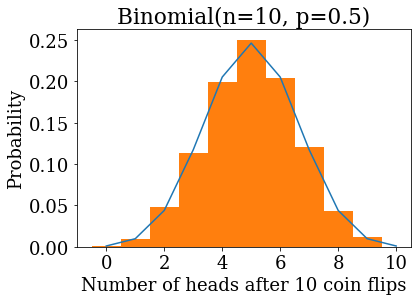

In [6]:
#Solution
def plot_binomial_with_samples(n, p, n_samples = 10000):
    def p_x_binomial(k, n, p):
        return sp.special.comb(n, k) * p**k * (1-p)**(n-k)
    
    x = np.arange(n+1) #Array of possible values
    probs = [p_x_binomial(k, n, p) for k in x] #Probabilities
    samples = np.random.choice(x, size = n_samples, p = probs)
    
    plt.plot(x, probs)
    plt.hist(samples, density=True, bins=len(x)-1, align="left")
    plt.title(f"Binomial(n={n}, p={p})")
    plt.ylabel("Probability")
    plt.xlabel(f"Number of heads after {n} coin flips")
    return plt.gcf()

fig = plot_binomial_with_samples(10, 0.5)

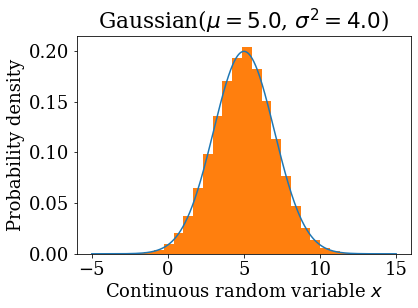

In [7]:
def plot_gaussian_with_samples(mean, var, n_samples = 1000000):
    def p_x_gaussian(x, mu, var):
        return (2*np.pi*var)**0.5 * np.exp(-(x-mu)**2 / (2*var))
    
    x = np.linspace(mean - 5*np.sqrt(var), mean + 5*np.sqrt(var) , num=1000)
    probs = [p_x_gaussian(k, mean, var) for k in x]
    samples = np.random.choice(x, size = n_samples, p = probs/np.sum(probs))

    plt.plot(x, probs / ((x[1] - x[0])*np.sum(probs)))
    plt.hist(samples, density=True, bins=30)
    plt.title(r"Gaussian($\mu=%.1f$, $\sigma^2=%.1f$)"%(mean, var))
    plt.ylabel("Probability density")
    plt.xlabel(r"Continuous random variable $x$")
    return plt.gcf()

fig = plot_gaussian_with_samples(5, 4)

## Exercise 3: verifying the CLT
The CLT is very powerful in that you can use it to learn about the sample mean for _any_ distribution that has a mean and variance defined. As an extreme example, make repeated draws from a Bernoilli distribution and plot the distribution of sample means. Concretely, say you take a million draws. Find sample means for individual sets of 100 samples. Then, plot the distribution of the normalized sample means.

As a reminder, the Bernoulli distribution looks like:
$$
X \sim p^x(1-p)^{1-x}\,.
$$
Note that the Bernoulli distribution has a mean and variance of $\mu_x = p$ and $\sigma^2 = p(1-p)$, respectively (deriving these are left as an exercise to the fellow).

The sample mean is defined as
$$
\bar{X} = \frac{1}{N}\sum_{i=1}^N X_i
$$
and the CLT requires you to normalize the sample mean according to:
$$
Z_N = \frac{\bar{X} - \mu_X}{\sigma/\sqrt{N}}\,.
$$

Bonus: what happens to the CLT when the probability of heads ($p$) gets very close to an extreme (0 or 1)?

In [8]:
#Your code here
def CLT_with_Bernoulli(p, n_samples = 1000000, n_means = 10000):
    pass

CLT_with_Bernoulli(p = 0.5)

### Solution is below!
### Try to complete the exercise before going further!
### It's for your own benefit!

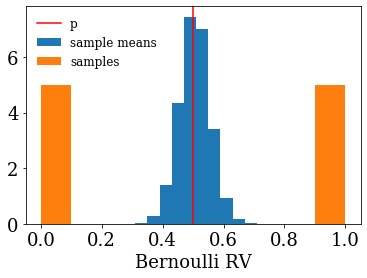

In [9]:
def CLT_with_Bernoulli(p, n_samples = 1000000, n_means = 10000):
    #draw samples
    samples = np.random.choice([0, 1], size = n_samples, p = [1-p, p])
    
    #compute sample means
    z = np.zeros(n_means)
    i = 0
    for index in range(0, n_samples, n_samples // n_means):
        z[i] = np.mean(samples[index: index + n_samples // n_means])
        i += 1
    plt.hist(z, density = True, label = "sample means")
    plt.hist(samples, density = True, label = "samples")
    plt.axvline(p, label = "p", c="red")
    plt.xlabel("Bernoulli RV")
    plt.legend(frameon = False, fontsize=12, loc="upper left")
    return plt.gcf()

fig = CLT_with_Bernoulli(p = 0.5)

## Plot for the talk: CDF
The plot below shows the $\approx 1-\alpha$ confidence interval with $\alpha = 0.32$ in this case

Text(0, 0.5, 'PDF of $x$')

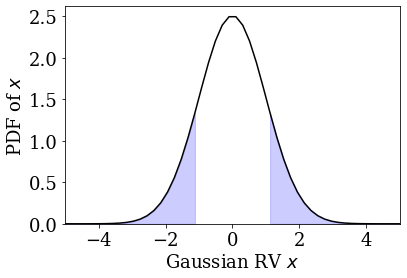

In [10]:
x = np.linspace(-5, 5)
pdf_x = (2*np.pi)**0.5 * np.exp(-x**2 / 2)

plt.plot(x, pdf_x, c='k')
plt.fill_between(x[x < -1], pdf_x[x < -1], color='b', alpha=0.2)
plt.fill_between(x[x > 1], pdf_x[x > 1], color='b', alpha=0.2)
plt.ylim(0, plt.gca().get_ylim()[1])
plt.xlim(x.min(), x.max())
plt.xlabel(r"Gaussian RV $x$")
plt.ylabel(r"PDF of $x$")
#plt.savefig("fig1.png", dpi=400, bbox_inches="tight")

## Exercise 4: confidence intervals for people's heights in NYC
Using the height data from exercise 1, what is a 95% confidence interval for the mean? Suppose we know that the variance of people's heights is 64 cm$^2$.

In [11]:
#Your code here
heights = [176.2, 157.9, 160.1, 180.9, 165.1, 167.2, 162.9, 155.7, 166.2] #cm
var_h = 64 #cm^2

## Exercise 5: detecting an aircraft
This is taken from the [Pishro-Nik](https://www.probabilitycourse.com/chapter8/8_4_2_general_setting_definitions.php) textbook (Ex. 8.23).

Consider a radar system used to detect aircraft. The system receives a signal and, based on the received signal, it needs to decide if there is an aircraft being observed or not. Let X be the signal it receives. Suppose we know that:
X = W	if no aircraft is present
X = 1 + W if an aircraft is present
where W ~ N(0, 1/9). So we can say that the random variable Q = [0, 1] determines the presents of an aircraft. Now you can:

1. Design a null hypothesis $H_0$ and an alternative $H_1$ to determine the presence of an aircraft.
2. Design a level 0.05 test (α = 0.05) to decide between the two. (Note: this is done by defining a _threshold_ that $X$ has to exceed).
3. Find the probability of a type 2 error, B, for the above test (this is the probability of missing a present aircraft, or a FN).
4. If we observe X = 0.6, is there enough evidence to reject $H_0$ at a α = 0.01 level?
5. If we want the probability of missing an aircraft to be less than 5% (i.e. B = 0.05) what is the smallest significance we can achieve (i.e. the smallest α?

## Solutions

1. $H_0$ occurs if $Q = 0$. $H_1$ occurs if $Q = 1$.
2. We decide between the two hypotheses by observing if $X$ is greater than some threshold $c$. If $X>c$ then we choose $H_1$. So we want to find:
$$
P({\rm type\ 1\ error}) = P({\rm reject}\ H_0|H_0)
$$
$$
= P(X > c | H_0)
$$
$$
= P(X > c)
$$
$$
= 1 - \Phi(3c)\,.
$$
The last equality occurs because the standard deviation of $X$ is 1/3, so we computing the probability that $X$ exceeds "c-sigmas" from its mean (which is 0). If we want a $\alpha = 0.05$ significance test, then setting the left side to 0.05 and inverting we can solve for $c$ to find
$$
c = \sigma\Phi^{-1}(1-\alpha) = \frac{1}{3}\Phi^{-1}(0.95) = 0.548\,.
$$

3. A type 2 error occurs with probability B found by writing:
$$
B = P({\rm type\ 2\ error}) = P({\rm accept}\ H_0|H_1)
$$
$$
= P(X < c|H_1)
$$
$$
= P(1+W < c)
$$
$$
= P(W < c - 1)
$$
$$
= \Phi\left(\frac{c-1}{\sigma}\right) = \Phi(3(c-1))\,.
$$
Plugging in $c=0.548$ we find $B = 0.088$.

4. In (2) we found 
$$
c = \sigma \Phi^{-1}(1-\alpha)\,,
$$
meaning when we set $\alpha = 0.01$ we obtain $c = 0.775$. Our observed $X < c$, meaning we cannot reject $H_0$ at the 1% level.

5. If we want to minimize how often we miss an airplane we can set $B=0.05$. This way, we only miss a plane 5% of the time. Doing so sets the decision boundary and so it sets $\alpha$ (the type 1 error rate) as well. We see that we can write
$$
B = \Phi\left(\frac{c-1}{\sigma}\right)
$$
and inverting yields
$$
c = 1 + \sigma\Phi^{-1}(B)\,.
$$
Since we are enforcing $B=0.05$ we have $c = 0.452$. Then, to obtain $\alpha$ we have
$$
\alpha = 1 - \Phi\left(\frac{c}{\sigma}\right)
$$
which yields $\alpha = 0.0877$. In words, this means that the smallest significance level we can obtain (i.e. the smallest false negative rate).

In [12]:
#Computations for the previous exercise
Phi = ss.norm.cdf
Phi_inv = ss.norm.ppf
sigma = 1./3.

#part 2
print("Part 2")
alpha = 0.05
c = sigma * Phi_inv(1 - alpha)
print(f"c = {c:.3f}")

#part 3
print("\nPart 3")
B = Phi((c - 1)/sigma)
print(f"B = {B:.3f}")

#part 4
alpha = 0.01
c = sigma * Phi_inv(1 - alpha)
X = 0.6
print("\nPart 4")
print(f"X = {X}")
print(f"c = {c:.3f}")
print(f"X < c: {X < c}")
if X < c:
    print(f"We cannot reject H0 at significance alpha={alpha}")
else:
    print("We can reject H0 at significance alpha={alpha}")

#part 5
B = 0.05
c = 1 + sigma * Phi_inv(B)
alpha = 1 - Phi(c/sigma)
print("\nPart 5")
print(f"alpha = {alpha:.4f}")

Part 2
c = 0.548

Part 3
B = 0.088

Part 4
X = 0.6
c = 0.775
X < c: True
We cannot reject H0 at significance alpha=0.01

Part 5
alpha = 0.0877
